In [6]:
 ## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.
    
# Min-Max scaling is a data preprocessing technique used to transform numerical features to a fixed range, typically between 0 and 1. The formula is:
# X_scaled = (X - X_min) / (X_max - X_min)
# Example: 
ages = [20, 30, 40, 50, 60]
X_min = min(ages)
X_max = max(ages)
X_scaled = [(age - X_min) / (X_max - X_min) for age in ages]

print(f"After scaling, the ages would be: {X_scaled}")
    

After scaling, the ages would be: [0.0, 0.25, 0.5, 0.75, 1.0]


In [7]:
import numpy as np

vector = np.array([3, 4])
norm = np.linalg.norm(vector)
normalized_vector = vector / norm

print(f"Normalized vector: {normalized_vector}")


Normalized vector: [0.6 0.8]


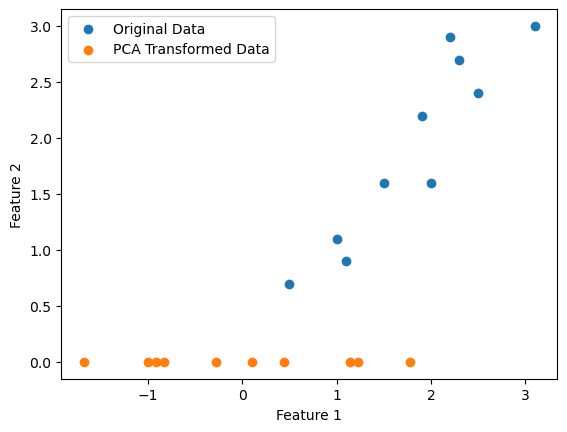

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Standardize the data
X_meaned = X - np.mean(X, axis=0)

# Perform PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_meaned)

# Plot the original data and the principal component
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(X_pca, np.zeros_like(X_pca), label='PCA Transformed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jovyan/scikit_learn_data


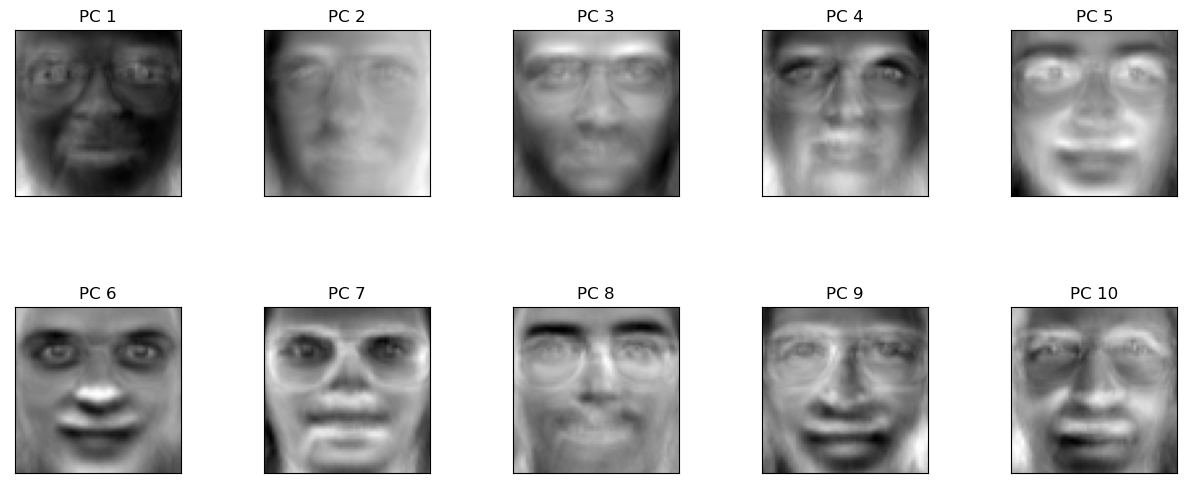

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load a sample dataset of faces
faces = fetch_olivetti_faces()
X = faces.data

# Standardize the data
X_meaned = X - np.mean(X, axis=0)

# Perform PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_pca = pca.fit_transform(X_meaned)

# Visualize the first few principal components
fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5, wspace=0.5))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'PC {i+1}')
plt.show()


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample data
## Price, Rating, Delivery Time
data = np.array([
    [10, 4.5, 30],
    [20, 4.0, 45],
    [15, 3.5, 25],
    [25, 5.0, 35],
    [30, 3.0, 40]
])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Print the scaled data
print("Scaled Data:")
print(scaled_data)


Scaled Data:
[[0.   0.75 0.25]
 [0.5  0.5  1.  ]
 [0.25 0.25 0.  ]
 [0.75 1.   0.5 ]
 [1.   0.   0.75]]


In [14]:
## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
## features, such as company financial data and market trends. Explain how you would use PCA to reduce the 
## dimensionality of the dataset.

# To use PCA for the stock price prediction dataset:

# 1.Standardize the features (important for PCA).
# 2.Apply PCA to the standardized data.
# 3.Examine the explained variance ratio of the principal components.
# Choose a number of components that explain a significant portion of the variance (e.g., 95%).
# Transform your data using these components.

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
data = {
    'Revenue': [100, 200, 300, 400, 500],
    'Profit': [10, 20, 30, 40, 50],
    'Market_Cap': [1000, 2000, 3000, 4000, 5000],
    'Stock_Trend': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Print the transformed data
print("PCA Transformed Data:")
print(X_pca)


PCA Transformed Data:
[[ 2.82842712e+00  3.64856517e-16]
 [ 1.41421356e+00 -1.21618839e-16]
 [-0.00000000e+00  0.00000000e+00]
 [-1.41421356e+00  1.21618839e-16]
 [-2.82842712e+00  2.43237678e-16]]


In [19]:
## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
## values to a range of -1 to 1.

## X_scaled = 2 * (X - X_min) / (X_max - X_min) - 1

original = [1, 5, 10, 15, 20]
scaled = [2 * (x - 1) / (20 - 1) - 1 for x in original]
print(scaled)

[-1.0, -0.5789473684210527, -0.052631578947368474, 0.4736842105263157, 1.0]


In [20]:
## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
# Feature Extraction using PCA. How many principal components would you choose to retain, and why?
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
data = {
    'Height': [170, 160, 180, 175, 165],
    'Weight': [70, 60, 80, 75, 65],
    'Age': [25, 30, 35, 40, 45],
    'Gender': [0, 1, 0, 1, 0],  # Encoded as 0 or 1
    'Blood_Pressure': [120, 130, 125, 135, 140]
}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Determine the number of components to retain
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain: {num_components}")
print(f"Cumulative variance explained by {num_components} components: {cumulative_variance[num_components-1]:.2f}")


Number of components to retain: 3
Cumulative variance explained by 3 components: 1.00
